## Model 2: XGBoosting

### Data preprocessing

In [ ]:
dfXGB=telco.copy()

# Supongamos que 'df' es tu DataFrame

columns_to_drop = ["Zip Code", "Latitude", "Longitude", "Population", 'Customer ID','Senior Citizen', 'Dependents', 'Internet Service', 'City']
dfXGB = dfXGB.drop(columns=columns_to_drop)


Convert Yes to 1 and No to 0

In [ ]:
# Lista de columnas que se deben convertir
columns_to_convert = ["Phone Service", "Multiple Lines", "Online Security", "Online Backup",
                      "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies",
                      "Streaming Music", "Unlimited Data", "Paperless Billing", "Married"]

# Reemplaza "Yes" con 1 y "No" con 0 en las columnas seleccionadas
dfXGB[columns_to_convert] = dfXGB[columns_to_convert].replace({"Yes": 1, "No": 0})


Gender will be transformed too with Female: 1 and Male: 0

In [ ]:
# Define un diccionario de mapeo
gender_mapping = {"Female": 1, "Male": 0}

# Aplica el mapeo a la columna "Gender"
dfXGB["Gender"] = dfXGB["Gender"].map(gender_mapping)


The same we do with the column Contract

In [ ]:
contract_mapping = {
    'Two Year': 2,
    'One Year': 1,
    'Month-to-Month': 0
}

# Aplicar el mapeo a la columna "Contract"
dfXGB['Contract'] = dfXGB['Contract'].map(contract_mapping)

Payment Method, Internet Type, Offer

In [ ]:
dfXGB["Payment Method"].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [ ]:
dfXGB["Internet Type"].value_counts()

Fiber Optic    2291
DSL            1680
Cable          1546
None           1526
Name: Internet Type, dtype: int64

In [ ]:
dfXGB["Offer"].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

Label encoding is not a suitable option in cases where there is no inherent ordinal relationship between the categories of a categorical variable. Label encoding assigns a unique numerical value to each category, which may imply an order or ranking that doesn't exist. This can lead to misleading interpretations by machine learning models, as they may incorrectly assume a relationship between the numbers assigned to the categories. For instance, if we label encode non-ordinal features like "Offer" or "City," the models might erroneously interpret the encoded values as having a meaningful sequence or hierarchy. In such situations, one-hot encoding is a more appropriate choice, as it treats each category as a separate binary variable, avoiding the introduction of unintended relationships between categories.

### One-hot encoding

In [ ]:
columns_to_dummy = ["Payment Method", "Internet Type", "Offer"]
dfXGB = pd.get_dummies(dfXGB, columns=columns_to_dummy, drop_first=True)

In [ ]:
dfXGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Phone Service                      7043 non-null   int64  
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Multiple Lines                     7043 non-null   int64  
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Online Security                    7043 non-null   int64  
 7   Online Backup                      7043 non-null   int64  
 8   Device Protection Plan             7043 non-null   int64  
 9   Premium Tech Support               7043 non-null   int64  
 10  Streaming TV                       7043 non-null   int64  
 11  Streaming Movies                   7043 non-null   int64

### Train test split

Stratified splitting:

In [ ]:
X = dfXGB.drop('Churn Value', axis=1)
y = dfXGB['Churn Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

### Model

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

Features

In [ ]:
print(X_train.columns)

Index(['Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Married',
       'Number of Dependents', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_None', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E'],
      dtype='object')


Importance of characteristics

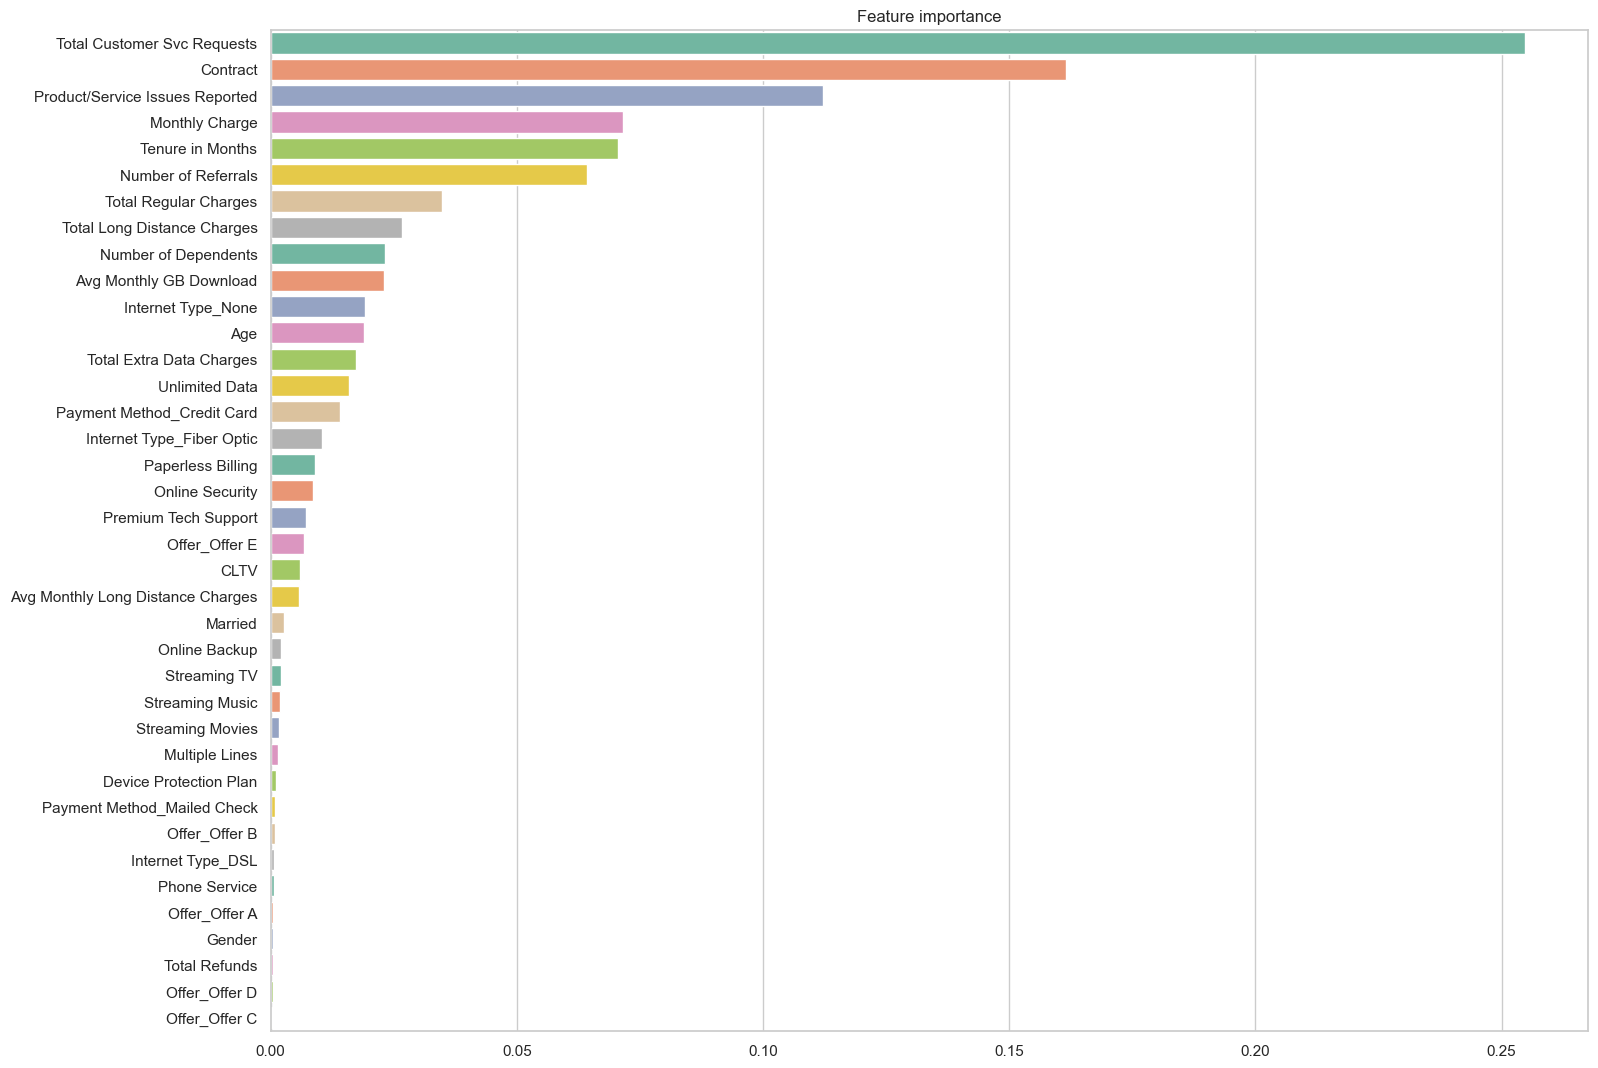

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10000, random_state=42)
clf = clf.fit(X_train, y_train)

fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette=palette, orient='h')


In [ ]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = XGBC.predict(X_test)

In [ ]:
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

Confussion_matrix_XGB = confusion_matrix(y_test, y_pred)
print(Confussion_matrix_XGB)

[[1245   49]
 [  83  384]]


- True Positives (384) represent cases where the model correctly predicted the positive class.
- False Positives (49) represent cases where the model incorrectly predicted the positive class.
- True Negatives (1,245) represent cases where the model correctly predicted the negative class.
- False Negatives (83) represent cases where the model incorrectly predicted the negative class.

K-fold

In [ ]:
from statistics import stdev
from sklearn.model_selection import cross_val_score


In [ ]:
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.82918149 0.80427046 0.78214286 0.78928571 0.80714286]
Average Cross Validation Recall score:  0.8024046771733604
Cross Validation Recall standard deviation:  0.018204243995687458


The results of the cross-validation for the "Recall" metric (Recall measures the proportion of true positives over the sum of true positives and false negatives) are as follows:

1. "Cross Validation Recall scores" are the Recall scores for each of the 5 cross-validation folds. These values represent the Recall score for each test dataset in each fold.

2. "Average Cross Validation Recall score" is the average of the Recall scores across the 5 folds. In this case, the average score is approximately 0.8024. This indicates that, on average, the model has a Recall rate of 80.24% across the 5 cross-validation folds.

3. "Cross Validation Recall standard deviation" is the standard deviation of the Recall scores across the 5 folds. In this case, the standard deviation is approximately 0.0182. The standard deviation measures the variability of the Recall scores between the different folds. A lower standard deviation indicates less variability in Recall scores across the folds.

In summary, the results suggest that the model performs well in terms of Recall, with an average of approximately 80.24%. The relatively low standard deviation (0.0182) implies that the Recall scores are consistent across different cross-validation folds, indicating that the model is robust and generalizes effectively to different test datasets.

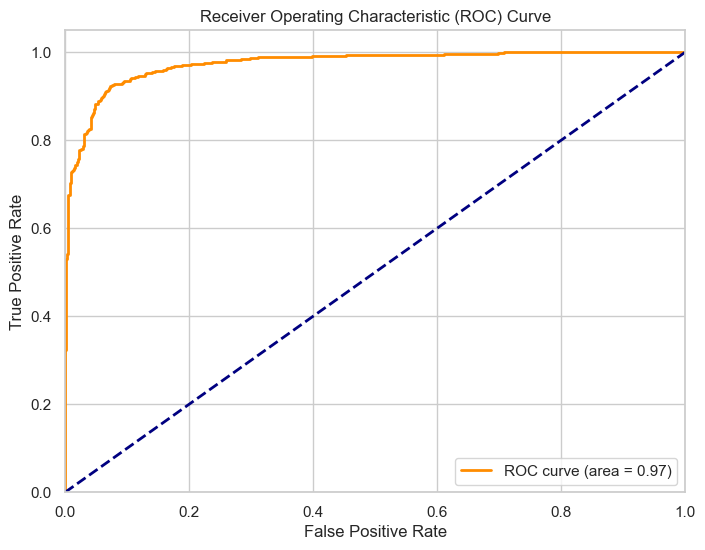

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtén las probabilidades de predicción del modelo
y_prob = XGBC.predict_proba(X_test)[:, 1]

# Calcula el AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Crea la curva AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
